In [3]:
import pandas as pd

In [3]:
# df = pd.read_csv('/home/cristiano/ufpr/tcc/resultados-feature-selection/rfe_feature_selection_binary.csv')

In [4]:
# df

In [4]:
methods = ['baseline', 'linear', 'pacmap', 'autoencoder', 'feature_selection']

In [5]:
def print_results(method): 
    if method == 'autoencoder':
        model_1 = f'{method}_binary.csv'
        model_2 = f'{method}_multiclass.csv'

    elif method == "feature_selection":
        model_1 = 'rfe_feature_selection_binary.csv'
        model_2 = 'rfe_feature_selection_multiclass.csv'
    else:
        model_1 = f'{method}_binary.parquet'
        model_2 = f'{method}_multiclass.parquet'

    df_1 = pd.read_csv(f'/home/cristiano/ufpr/consolidado-tcc-resultados/results/metrics/{model_1}')
    df_2 = pd.read_csv(f'/home/cristiano/ufpr/consolidado-tcc-resultados/results/metrics/{model_2}')

    
    print(f'----------------------- {method} -----------------------')
    print(f'----------------------- Binary -----------------------')
    print(df_1)
    print('------------------------------------------------------')
    print(f'--------------------- Multiclass ---------------------')
    print(df_2)
    print('------------------------------------------------------')

In [6]:
for method in methods:
    print_results(method)

----------------------- baseline -----------------------
----------------------- Binary -----------------------
  Reduction Method  n_components  CV Accuracy  Test Accuracy  Test F1 Score  \
0         baseline            53     0.907208       0.907579       0.686967   

   Test Precision  Test Recall  Training Time  
0         0.75694     0.628836      12.331866  
------------------------------------------------------
--------------------- Multiclass ---------------------
  Reduction Method  n_components  CV Accuracy  Test Accuracy  Test F1 Score  \
0         baseline            53     0.742409       0.741968       0.730357   

   Test Precision  Test Recall  Training Time  
0        0.725768     0.741968     200.789694  
------------------------------------------------------
----------------------- linear -----------------------
----------------------- Binary -----------------------
   Reduction Method  n_components  CV Accuracy  Test Accuracy  Test F1 Score  \
0               pca    

In [1]:
# Constants
NUMERIC_COLS = [
    "TP_FAIXA_ETARIA", "TP_ESTADO_CIVIL", "TP_COR_RACA", "TP_NACIONALIDADE",
    "TP_ST_CONCLUSAO", "TP_ANO_CONCLUIU", "IN_TREINEIRO", "CO_MUNICIPIO_PROVA",
    "CO_UF_PROVA", "TP_PRESENCA_CN", "TP_PRESENCA_CH", "TP_PRESENCA_LC",
    "TP_PRESENCA_MT", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4",
    "NU_NOTA_COMP5", "TP_ESCOLA"
]

CATEGORICAL_COLS = [
    "TP_SEXO", "Q001", "Q002", "Q003", "Q004", "Q007", "Q008", "Q009", "Q010",
    "Q011", "Q012", "Q013", "Q014", "Q015", "Q016", "Q017", "Q018", "Q019",
    "Q020", "Q021", "Q022", "Q023", "Q024", "Q025", "NO_MUNICIPIO_PROVA",
    "TP_STATUS_REDACAO", "SG_UF_PROVA", "faixa_renda_familiar"
]

# Discarded columns categorized
DISCARDED_NUMERIC_COLS = [
    "NU_INSCRICAO", "NU_ANO", "TP_ENSINO", "CO_MUNICIPIO_ESC",
    "CO_UF_ESC",
    "TP_LOCALIZACAO_ESC", "TP_SIT_FUNC_ESC", "CO_PROVA_CN",
    "CO_PROVA_CH", "CO_PROVA_LC", "CO_PROVA_MT"
]

DISCARDED_CATEGORICAL_COLS = [
    "NO_MUNICIPIO_ESC", "SG_UF_ESC"
]

In [3]:
len(NUMERIC_COLS) + len(CATEGORICAL_COLS) + len(DISCARDED_NUMERIC_COLS) + len(DISCARDED_CATEGORICAL_COLS) 

59

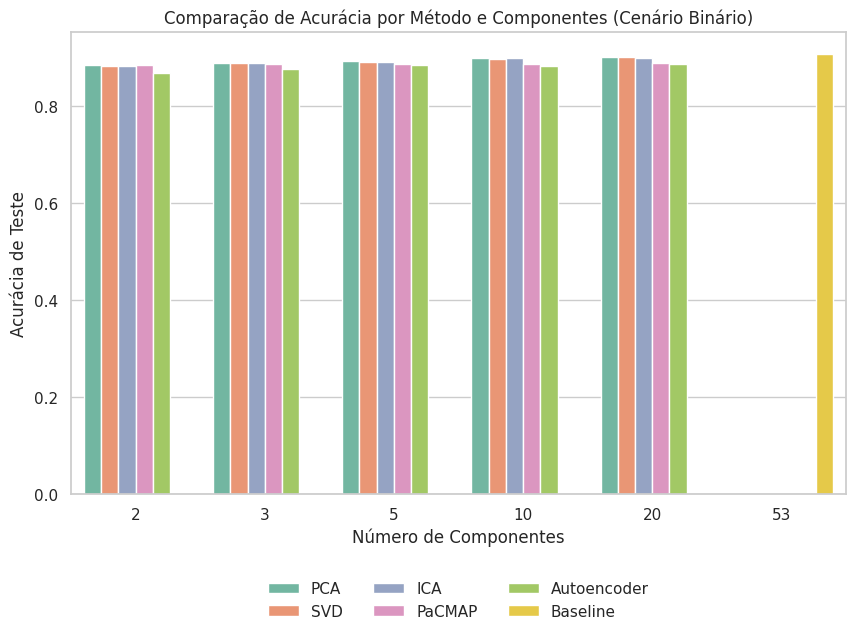

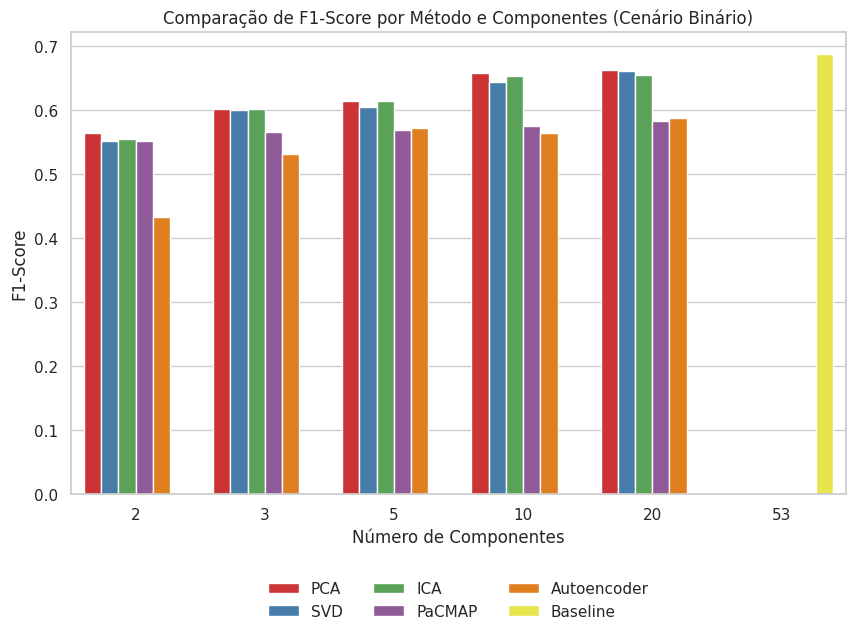

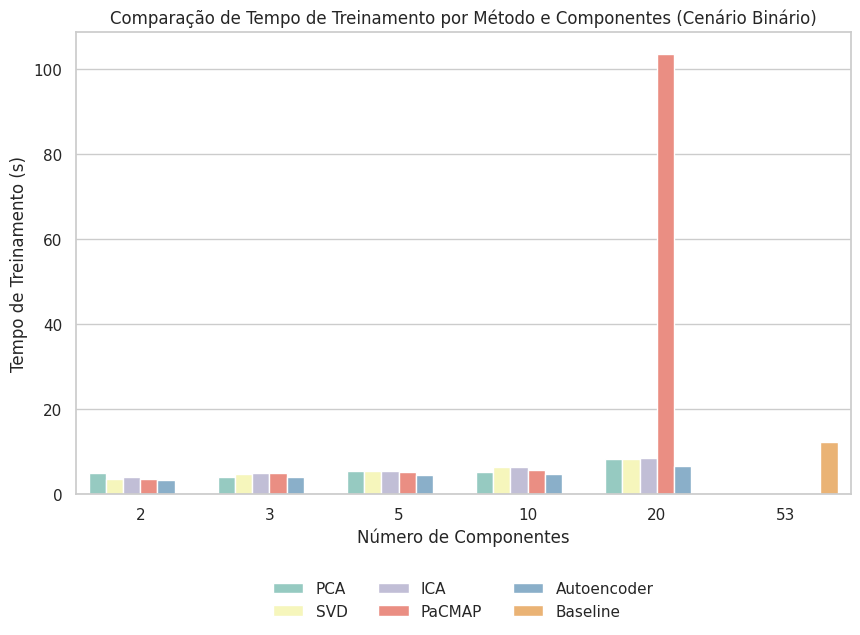

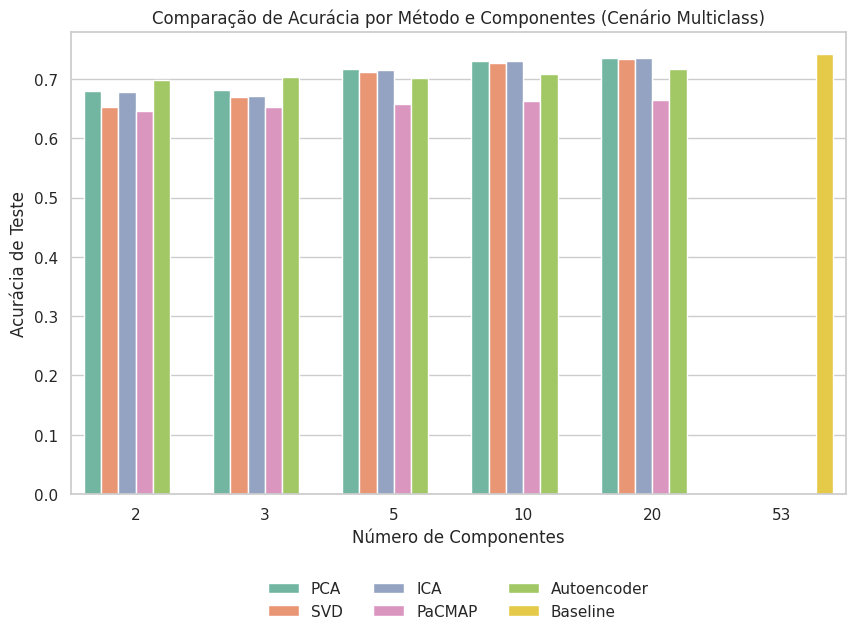

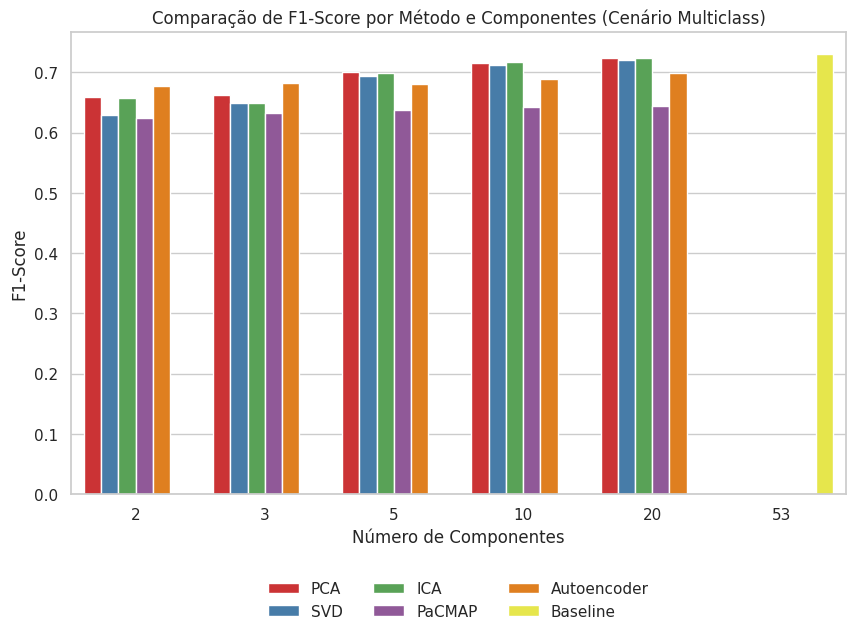

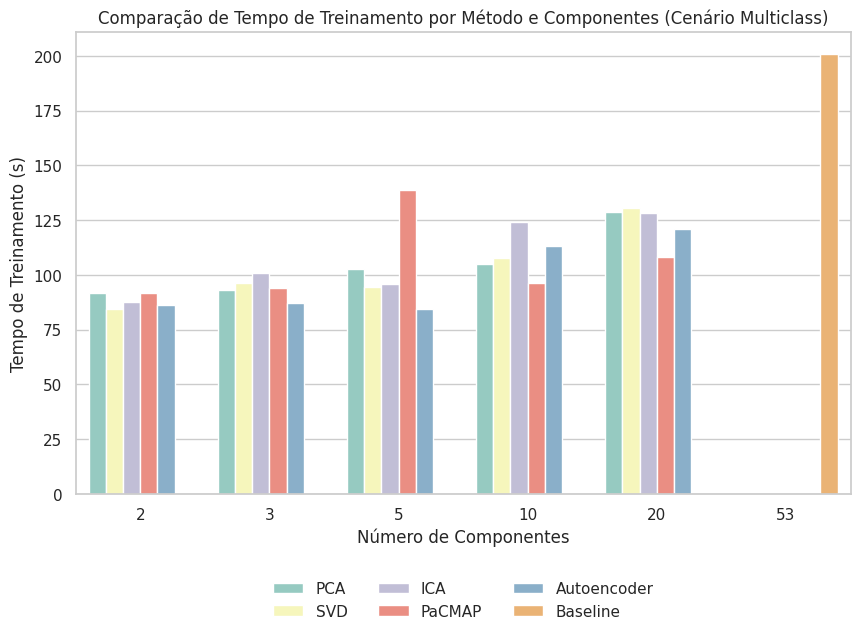

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definir os dados dos resultados para o cenário binário
binary_data = {
    'Método': ['Baseline', 'PCA', 'PCA', 'PCA', 'PCA', 'PCA', 'SVD', 'SVD', 'SVD', 'SVD', 'SVD', 
               'ICA', 'ICA', 'ICA', 'ICA', 'ICA', 'PaCMAP', 'PaCMAP', 'PaCMAP', 'PaCMAP', 'PaCMAP', 
               'Autoencoder', 'Autoencoder', 'Autoencoder', 'Autoencoder', 'Autoencoder'],
    'Componentes': [53, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20],
    'CV Acurácia': [0.9072, 0.8839, 0.8902, 0.8920, 0.9006, 0.9013, 0.8825, 0.8902, 0.8906, 0.8980, 0.9003, 
                    0.8824, 0.8901, 0.8921, 0.8993, 0.8993, 0.8847, 0.8868, 0.8874, 0.8877, 0.8884, 
                    0.8674, 0.8783, 0.8847, 0.8829, 0.8877],
    'Test Acurácia': [0.9076, 0.8843, 0.8899, 0.8925, 0.9004, 0.9014, 0.8826, 0.8899, 0.8907, 0.8982, 0.9008, 
                     0.8824, 0.8900, 0.8922, 0.8995, 0.8995, 0.8846, 0.8862, 0.8870, 0.8876, 0.8883, 
                     0.8675, 0.8776, 0.8849, 0.8831, 0.8876],
    'F1-Score': [0.687, 0.564, 0.601, 0.614, 0.658, 0.662, 0.551, 0.599, 0.605, 0.644, 0.660, 
                 0.554, 0.601, 0.613, 0.653, 0.654, 0.551, 0.565, 0.568, 0.574, 0.582, 
                 0.433, 0.531, 0.572, 0.564, 0.587],
    'Tempo (s)': [12.33, 4.87, 3.97, 5.41, 5.26, 8.19, 3.45, 4.80, 5.33, 6.47, 8.24, 
                  3.95, 4.92, 5.35, 6.41, 8.48, 3.65, 4.92, 5.11, 5.66, 103.52, 
                  3.39, 3.90, 4.50, 4.79, 6.48]
}

# Definir os dados dos resultados para o cenário multiclass
multiclass_data = {
    'Método': ['Baseline', 'PCA', 'PCA', 'PCA', 'PCA', 'PCA', 'SVD', 'SVD', 'SVD', 'SVD', 'SVD', 
               'ICA', 'ICA', 'ICA', 'ICA', 'ICA', 'PaCMAP', 'PaCMAP', 'PaCMAP', 'PaCMAP', 'PaCMAP', 
               'Autoencoder', 'Autoencoder', 'Autoencoder', 'Autoencoder', 'Autoencoder'],
    'Componentes': [53, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20],
    'CV Acurácia': [0.741968, 0.679256, 0.682169, 0.715990, 0.730133, 0.735934,
                    0.652011, 0.669578, 0.710908, 0.727067, 0.733108,
                    0.678422, 0.670496, 0.715033, 0.730386, 0.735575,
                    0.645602, 0.653230, 0.657625, 0.662074, 0.663657,
                    0.698650, 0.703136, 0.701800, 0.709036, 0.716195],
    'Test Acurácia': [0.741968, 0.679256, 0.682169, 0.715990, 0.730133, 0.735934,
                      0.652011, 0.669578, 0.710908, 0.727067, 0.733108,
                      0.678422, 0.670496, 0.715033, 0.730386, 0.735575,
                      0.645602, 0.653230, 0.657625, 0.662074, 0.663657,
                      0.698650, 0.703136, 0.701800, 0.709036, 0.716195],
    'F1-Score': [0.730357, 0.658440, 0.661908, 0.700052, 0.716226, 0.723240,
                 0.629321, 0.648718, 0.693940, 0.712452, 0.719843,
                 0.658087, 0.648833, 0.699352, 0.716622, 0.723002,
                 0.624337, 0.632459, 0.637154, 0.642016, 0.643531,
                 0.677521, 0.681769, 0.680857, 0.689664, 0.698306],
    'Tempo (s)': [200.789694, 91.929897, 93.056267, 102.772533, 104.913334, 128.582052,
                  84.572860, 96.248809, 94.452910, 107.807619, 130.686455,
                  87.506785, 100.680907, 95.801662, 123.992938, 128.082325,
                  91.869106, 94.117072, 138.923416, 96.180689, 108.206234,
                  86.169872, 87.375637, 84.409931, 112.978923, 121.059005]
}

# Criar os DataFrames
df_binary = pd.DataFrame(binary_data)
df_multiclass = pd.DataFrame(multiclass_data)

# Plotar gráficos de barras comparativos para Acurácia, F1-Score e Tempo para o cenário binário
sns.set(style="whitegrid")

# Gráfico de Acurácia (Binário)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='Test Acurácia', hue='Método', data=df_binary, palette="Set2")
plt.title('Comparação de Acurácia por Método e Componentes (Cenário Binário)')
plt.xlabel('Número de Componentes')
plt.ylabel('Acurácia de Teste')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3, frameon=False)  # Mover a legenda para fora do gráfico
plt.show()

# Gráfico de F1-Score (Binário)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='F1-Score', hue='Método', data=df_binary, palette="Set1")
plt.title('Comparação de F1-Score por Método e Componentes (Cenário Binário)')
plt.xlabel('Número de Componentes')
plt.ylabel('F1-Score')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3, frameon=False)  # Mover a legenda para fora do gráfico
plt.show()

# Gráfico de Tempo de Treinamento (Binário)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='Tempo (s)', hue='Método', data=df_binary, palette="Set3")
plt.title('Comparação de Tempo de Treinamento por Método e Componentes (Cenário Binário)')
plt.xlabel('Número de Componentes')
plt.ylabel('Tempo de Treinamento (s)')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3, frameon=False)  # Mover a legenda para fora do gráfico
plt.show()

# Plotar gráficos de barras comparativos para Acurácia, F1-Score e Tempo para o cenário multiclass

# Gráfico de Acurácia (Multiclass)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='Test Acurácia', hue='Método', data=df_multiclass, palette="Set2")
plt.title('Comparação de Acurácia por Método e Componentes (Cenário Multiclass)')
plt.xlabel('Número de Componentes')
plt.ylabel('Acurácia de Teste')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3, frameon=False)  # Mover a legenda para fora do gráfico
plt.show()

# Gráfico de F1-Score (Multiclass)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='F1-Score', hue='Método', data=df_multiclass, palette="Set1")
plt.title('Comparação de F1-Score por Método e Componentes (Cenário Multiclass)')
plt.xlabel('Número de Componentes')
plt.ylabel('F1-Score')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3, frameon=False)  # Mover a legenda para fora do gráfico
plt.show()

# Gráfico de Tempo de Treinamento (Multiclass)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='Tempo (s)', hue='Método', data=df_multiclass, palette="Set3")
plt.title('Comparação de Tempo de Treinamento por Método e Componentes (Cenário Multiclass)')
plt.xlabel('Número de Componentes')
plt.ylabel('Tempo de Treinamento (s)')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3, frameon=False)  # Mover a legenda para fora do gráfico
plt.show()


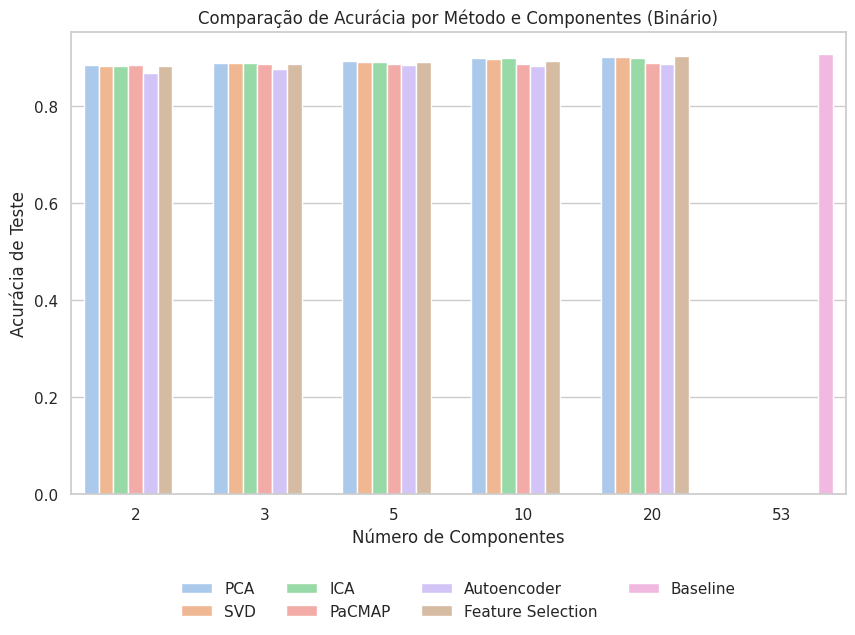

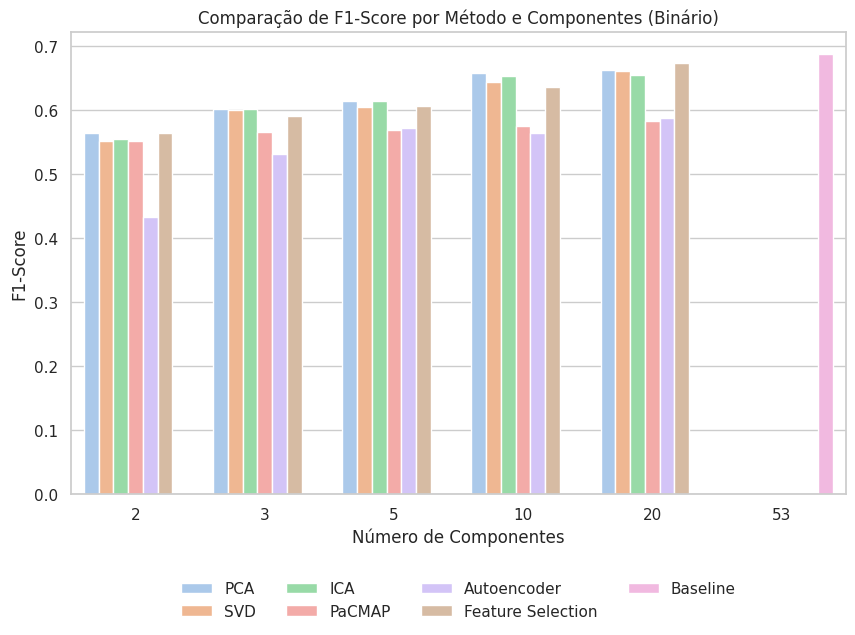

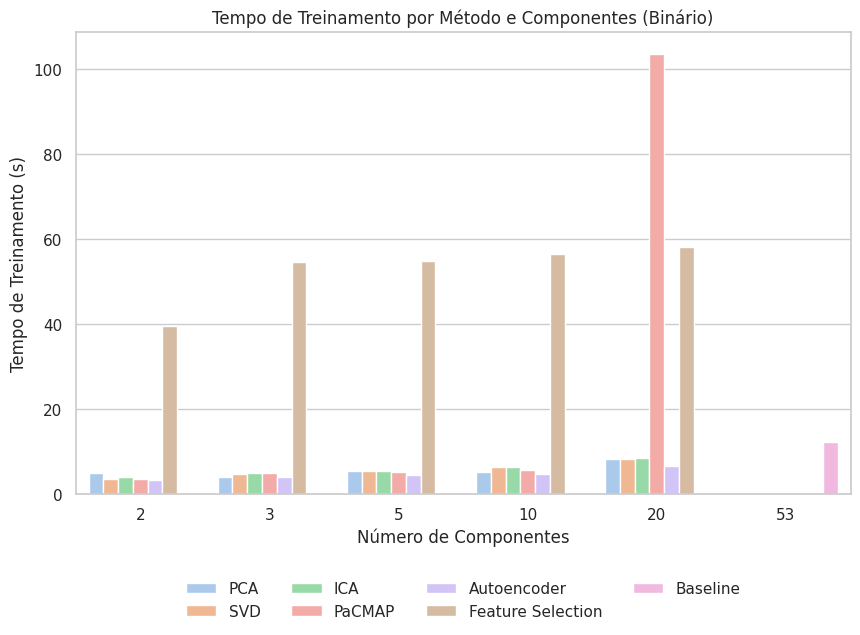

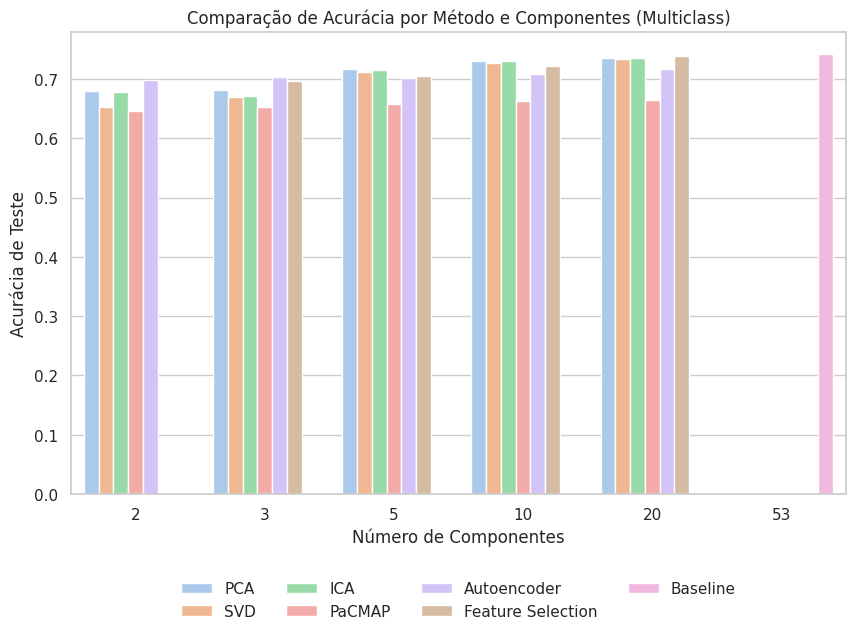

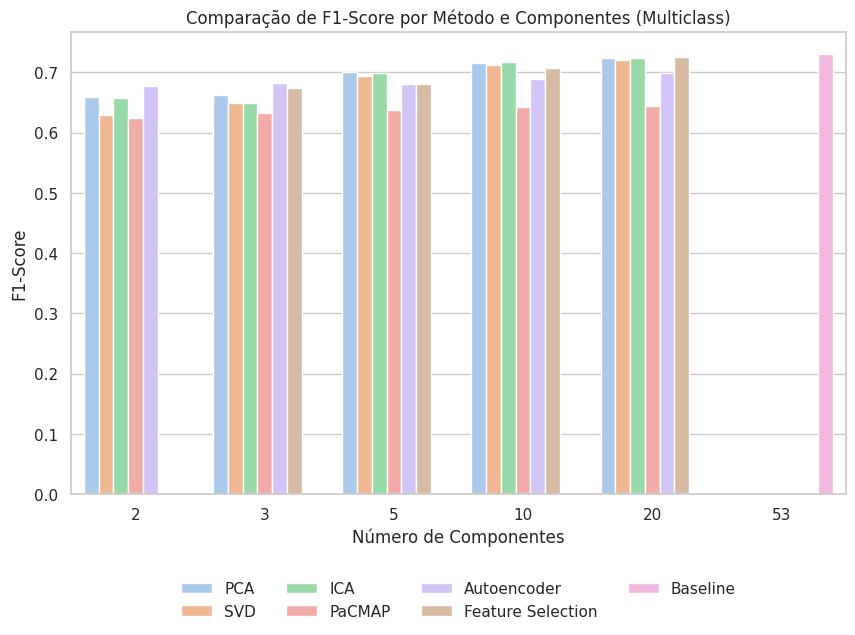

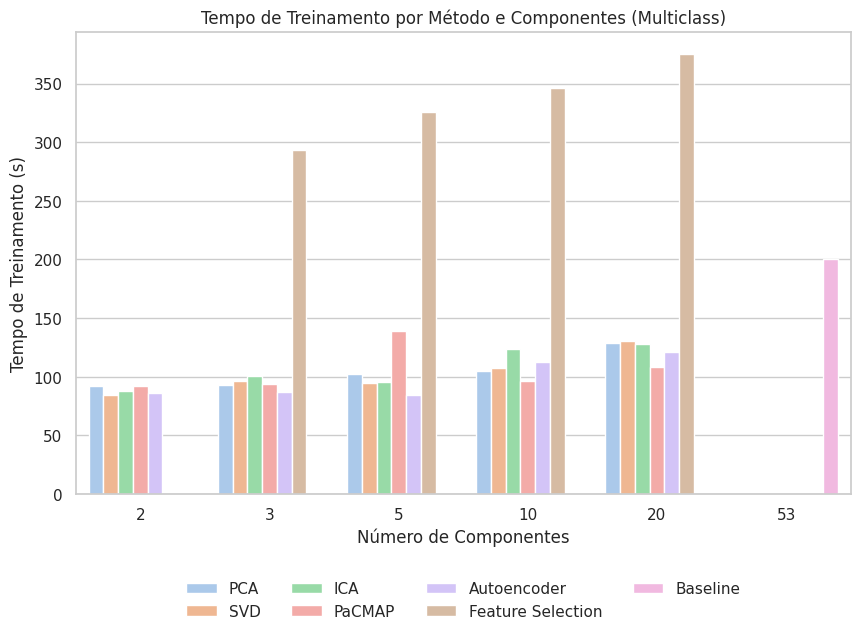

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuração de estilo e paleta pastel
sns.set(style="whitegrid", palette="pastel")

# Dados do cenário binário, incluindo Feature Selection (sem 53 componentes)
binary_data = {
    'Método': ['Baseline', 'PCA', 'PCA', 'PCA', 'PCA', 'PCA', 'SVD', 'SVD', 'SVD', 'SVD', 'SVD', 
               'ICA', 'ICA', 'ICA', 'ICA', 'ICA', 'PaCMAP', 'PaCMAP', 'PaCMAP', 'PaCMAP', 'PaCMAP', 
               'Autoencoder', 'Autoencoder', 'Autoencoder', 'Autoencoder', 'Autoencoder', 
               'Feature Selection', 'Feature Selection', 'Feature Selection', 'Feature Selection', 'Feature Selection'],
    'Componentes': [53, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20,
                    2, 3, 5, 10, 20],
    'CV Acurácia': [0.9072, 0.8839, 0.8902, 0.8920, 0.9006, 0.9013, 0.8825, 0.8902, 0.8906, 0.8980, 0.9003, 
                    0.8824, 0.8901, 0.8921, 0.8993, 0.8993, 0.8847, 0.8868, 0.8874, 0.8877, 0.8884, 
                    0.8674, 0.8783, 0.8847, 0.8829, 0.8877, 
                    0.8832, 0.8879, 0.8905, 0.8937, 0.9044],
    'Test Acurácia': [0.9076, 0.8843, 0.8899, 0.8925, 0.9004, 0.9014, 0.8826, 0.8899, 0.8907, 0.8982, 0.9008, 
                     0.8824, 0.8900, 0.8922, 0.8995, 0.8995, 0.8846, 0.8862, 0.8870, 0.8876, 0.8883, 
                     0.8675, 0.8776, 0.8849, 0.8831, 0.8876, 
                     0.8832, 0.8879, 0.8905, 0.8937, 0.9044],
    'F1-Score': [0.687, 0.564, 0.601, 0.614, 0.658, 0.662, 0.551, 0.599, 0.605, 0.644, 0.660, 
                 0.554, 0.601, 0.613, 0.653, 0.654, 0.551, 0.565, 0.568, 0.574, 0.582, 
                 0.433, 0.531, 0.572, 0.564, 0.587, 
                 0.564, 0.590, 0.606, 0.635, 0.673],
    'Tempo (s)': [12.33, 4.87, 3.97, 5.41, 5.26, 8.19, 3.45, 4.80, 5.33, 6.47, 8.24, 
                  3.95, 4.92, 5.35, 6.41, 8.48, 3.65, 4.92, 5.11, 5.66, 103.52, 
                  3.39, 3.90, 4.50, 4.79, 6.48, 
                  39.47, 54.54, 54.75, 56.40, 58.17]
}

# Dados do cenário multiclass, incluindo Feature Selection (sem 53 componentes)
multiclass_data = {
    'Método': ['Baseline', 'PCA', 'PCA', 'PCA', 'PCA', 'PCA', 'SVD', 'SVD', 'SVD', 'SVD', 'SVD', 
               'ICA', 'ICA', 'ICA', 'ICA', 'ICA', 'PaCMAP', 'PaCMAP', 'PaCMAP', 'PaCMAP', 'PaCMAP', 
               'Autoencoder', 'Autoencoder', 'Autoencoder', 'Autoencoder', 'Autoencoder', 
               'Feature Selection', 'Feature Selection', 'Feature Selection', 'Feature Selection'],
    'Componentes': [53, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20,
                    3, 5, 10, 20],
    'CV Acurácia': [0.741968, 0.679256, 0.682169, 0.715990, 0.730133, 0.735934,
                    0.652011, 0.669578, 0.710908, 0.727067, 0.733108,
                    0.678422, 0.670496, 0.715033, 0.730386, 0.735575,
                    0.645602, 0.653230, 0.657625, 0.662074, 0.663657,
                    0.698650, 0.703136, 0.701800, 0.709036, 0.716195,
                    0.696528, 0.704395, 0.722244, 0.738158],
    'Test Acurácia': [0.741968, 0.679256, 0.682169, 0.715990, 0.730133, 0.735934,
                      0.652011, 0.669578, 0.710908, 0.727067, 0.733108,
                      0.678422, 0.670496, 0.715033, 0.730386, 0.735575,
                      0.645602, 0.653230, 0.657625, 0.662074, 0.663657,
                      0.698650, 0.703136, 0.701800, 0.709036, 0.716195,
                      0.696528, 0.704395, 0.722244, 0.738158],
    'F1-Score': [0.730357, 0.658440, 0.661908, 0.700052, 0.716226, 0.723240,
                 0.629321, 0.648718, 0.693940, 0.712452, 0.719843,
                 0.658087, 0.648833, 0.699352, 0.716622, 0.723002,
                 0.624337, 0.632459, 0.637154, 0.642016, 0.643531,
                 0.677521, 0.681769, 0.680857, 0.689664, 0.698306,
                 0.674411, 0.680773, 0.707111, 0.725595],
    'Tempo (s)': [200.79, 91.93, 93.06, 102.77, 104.91, 128.58,
                  84.57, 96.25, 94.45, 107.80, 130.69,
                  87.51, 100.68, 95.80, 123.99, 128.08,
                  91.87, 94.12, 138.92, 96.18, 108.21,
                  86.17, 87.38, 84.41, 112.98, 121.06,
                  292.96, 325.68, 345.85, 375.16]
}

# Criar os DataFrames
df_binary = pd.DataFrame(binary_data)
df_multiclass = pd.DataFrame(multiclass_data)

# Gráficos para cenário binário

# Gráfico de Acurácia (Binário)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='Test Acurácia', hue='Método', data=df_binary, palette="pastel")
plt.title('Comparação de Acurácia por Método e Componentes (Binário)')
plt.xlabel('Número de Componentes')
plt.ylabel('Acurácia de Teste')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon=False)
plt.show()

# Gráfico de F1-Score (Binário)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='F1-Score', hue='Método', data=df_binary, palette="pastel")
plt.title('Comparação de F1-Score por Método e Componentes (Binário)')
plt.xlabel('Número de Componentes')
plt.ylabel('F1-Score')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon=False)
plt.show()

# Gráfico de Tempo de Treinamento (Binário)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='Tempo (s)', hue='Método', data=df_binary, palette="pastel")
plt.title('Tempo de Treinamento por Método e Componentes (Binário)')
plt.xlabel('Número de Componentes')
plt.ylabel('Tempo de Treinamento (s)')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon=False)
plt.show()

# Gráficos para cenário multiclass

# Gráfico de Acurácia (Multiclass)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='Test Acurácia', hue='Método', data=df_multiclass, palette="pastel")
plt.title('Comparação de Acurácia por Método e Componentes (Multiclass)')
plt.xlabel('Número de Componentes')
plt.ylabel('Acurácia de Teste')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon=False)
plt.show()

# Gráfico de F1-Score (Multiclass)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='F1-Score', hue='Método', data=df_multiclass, palette="pastel")
plt.title('Comparação de F1-Score por Método e Componentes (Multiclass)')
plt.xlabel('Número de Componentes')
plt.ylabel('F1-Score')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon=False)
plt.show()

# Gráfico de Tempo de Treinamento (Multiclass)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='Tempo (s)', hue='Método', data=df_multiclass, palette="pastel")
plt.title('Tempo de Treinamento por Método e Componentes (Multiclass)')
plt.xlabel('Número de Componentes')
plt.ylabel('Tempo de Treinamento (s)')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon=False)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuração de estilo e paleta pastel
sns.set(style="whitegrid", palette="pastel")

# Dados do cenário binário, incluindo Feature Selection (agora com 10 componentes)
binary_data = {
    'Método': ['Baseline', 'PCA', 'PCA', 'PCA', 'PCA', 'PCA', 'SVD', 'SVD', 'SVD', 'SVD', 'SVD', 
               'ICA', 'ICA', 'ICA', 'ICA', 'ICA', 'PaCMAP', 'PaCMAP', 'PaCMAP', 'PaCMAP', 'PaCMAP', 
               'Autoencoder', 'Autoencoder', 'Autoencoder', 'Autoencoder', 'Autoencoder', 
               'Feature Selection', 'Feature Selection', 'Feature Selection', 'Feature Selection', 'Feature Selection'],
    'Componentes': [53, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20, 2, 3, 5, 10, 20,
                    2, 3, 5, 10, 20],
    'CV Acurácia': [0.9072, 0.8839, 0.8902, 0.8920, 0.9006, 0.9013, 0.8825, 0.8902, 0.8906, 0.8980, 0.9003, 
                    0.8824, 0.8901, 0.8921, 0.8993, 0.8993, 0.8847, 0.8868, 0.8874, 0.8877, 0.8884, 
                    0.8674, 0.8783, 0.8847, 0.8829, 0.8877, 
                    0.8832, 0.8879, 0.8905, 0.8937, 0.9044],
    'Test Acurácia': [0.9076, 0.8843, 0.8899, 0.8925, 0.9004, 0.9014, 0.8826, 0.8899, 0.8907, 0.8982, 0.9008, 
                     0.8824, 0.8900, 0.8922, 0.8995, 0.8995, 0.8846, 0.8862, 0.8870, 0.8876, 0.8883, 
                     0.8675, 0.8776, 0.8849, 0.8831, 0.8876, 
                     0.8832, 0.8879, 0.8905, 0.8937, 0.9044],
    'F1-Score': [0.687, 0.564, 0.601, 0.614, 0.658, 0.662, 0.551, 0.599, 0.605, 0.644, 0.660, 
                 0.554, 0.601, 0.613, 0.653, 0.654, 0.551, 0.565, 0.568, 0.574, 0.582, 
                 0.433, 0.531, 0.572, 0.564, 0.587, 
                 0.564, 0.590, 0.606, 0.635, 0.673],
    'Tempo (s)': [12.33, 4.87, 3.97, 5.41, 5.26, 8.19, 3.45, 4.80, 5.33, 6.47, 8.24, 
                  3.95, 4.92, 5.35, 6.41, 8.48, 3.65, 4.92, 5.11, 5.66, 103.52, 
                  3.39, 3.90, 4.50, 4.79, 6.48, 
                  39.47, 54.54, 54.75, 56.40, 58.17]
}

# O resto do código permanece o mesmo...
# Criar os DataFrames
df_binary = pd.DataFrame(binary_data)
df_multiclass = pd.DataFrame(multiclass_data)

# Gráficos para cenário binário

# Gráfico de Acurácia (Binário)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='Test Acurácia', hue='Método', data=df_binary, palette="pastel")
plt.title('Comparação de Acurácia por Método e Componentes (Binário)')
plt.xlabel('Número de Componentes')
plt.ylabel('Acurácia de Teste')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon=False)
plt.show()

# Gráfico de F1-Score (Binário)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='F1-Score', hue='Método', data=df_binary, palette="pastel")
plt.title('Comparação de F1-Score por Método e Componentes (Binário)')
plt.xlabel('Número de Componentes')
plt.ylabel('F1-Score')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon=False)
plt.show()

# Gráfico de Tempo de Treinamento (Binário)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='Tempo (s)', hue='Método', data=df_binary, palette="pastel")
plt.title('Tempo de Treinamento por Método e Componentes (Binário)')
plt.xlabel('Número de Componentes')
plt.ylabel('Tempo de Treinamento (s)')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon=False)
plt.show()

# Gráficos para cenário multiclass

# Gráfico de Acurácia (Multiclass)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='Test Acurácia', hue='Método', data=df_multiclass, palette="pastel")
plt.title('Comparação de Acurácia por Método e Componentes (Multiclass)')
plt.xlabel('Número de Componentes')
plt.ylabel('Acurácia de Teste')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon=False)
plt.show()

# Gráfico de F1-Score (Multiclass)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='F1-Score', hue='Método', data=df_multiclass, palette="pastel")
plt.title('Comparação de F1-Score por Método e Componentes (Multiclass)')
plt.xlabel('Número de Componentes')
plt.ylabel('F1-Score')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon=False)
plt.show()

# Gráfico de Tempo de Treinamento (Multiclass)
plt.figure(figsize=(10, 6))
sns.barplot(x='Componentes', y='Tempo (s)', hue='Método', data=df_multiclass, palette="pastel")
plt.title('Tempo de Treinamento por Método e Componentes (Multiclass)')
plt.xlabel('Número de Componentes')
plt.ylabel('Tempo de Treinamento (s)')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon=False)
plt.show()


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuração de estilo e paleta pastel
sns.set(style="whitegrid", palette="pastel")

# Dados do cenário binário
binary_data = {
    'Método': [
        # Baseline
        'baseline',
        # PCA
        'pca', 'pca', 'pca', 'pca', 'pca',
        # SVD
        'svd', 'svd', 'svd', 'svd', 'svd',
        # ICA
        'ica', 'ica', 'ica', 'ica', 'ica',
        # PaCMAP
        'pacmap', 'pacmap', 'pacmap', 'pacmap', 'pacmap',
        # Autoencoder
        'autoencoder', 'autoencoder', 'autoencoder', 'autoencoder', 'autoencoder',
        # Feature Selection
        'feature_selection', 'feature_selection', 'feature_selection', 'feature_selection', 'feature_selection'
    ],
    'Componentes': [
        # Baseline
        53,
        # PCA components
        2, 3, 5, 10, 20,
        # SVD components
        2, 3, 5, 10, 20,
        # ICA components
        2, 3, 5, 10, 20,
        # PaCMAP components
        2, 3, 5, 10, 20,
        # Autoencoder components
        2, 3, 5, 10, 20,
        # Feature Selection number of features
        2, 3, 5, 10, 20
    ],
    'CV Acurácia': [
        # Baseline
        0.907208,
        # PCA CV Accuracy
        0.883915, 0.890202, 0.891977, 0.900556, 0.901257,
        # SVD CV Accuracy
        0.882450, 0.890172, 0.890600, 0.898041, 0.900302,
        # ICA CV Accuracy
        0.882391, 0.890081, 0.892068, 0.899344, 0.899309,
        # PaCMAP CV Accuracy
        0.884665, 0.886797, 0.887419, 0.887739, 0.888428,
        # Autoencoder CV Accuracy
        0.867375, 0.878330, 0.884666, 0.882906, 0.887716,
        # Feature Selection CV Accuracy (assumindo igual ao Test Accuracy)
        0.883197, 0.887914, 0.890536, 0.896828, 0.904422
    ],
    'Test Acurácia': [
        # Baseline
        0.907579,
        # PCA Test Accuracy
        0.884275, 0.889906, 0.892487, 0.900430, 0.901375,
        # SVD Test Accuracy
        0.882609, 0.889895, 0.890658, 0.898160, 0.900828,
        # ICA Test Accuracy
        0.882396, 0.889982, 0.892225, 0.899496, 0.899523,
        # PaCMAP Test Accuracy
        0.884575, 0.886248, 0.887030, 0.887565, 0.888282,
        # Autoencoder Test Accuracy
        0.867482, 0.877588, 0.884859, 0.883140, 0.887569,
        # Feature Selection Test Accuracy
        0.883197, 0.887914, 0.890536, 0.896828, 0.904422
    ],
    'F1-Score': [
        # Baseline
        0.686967,
        # PCA F1-Score
        0.563515, 0.600823, 0.613645, 0.657816, 0.661949,
        # SVD F1-Score
        0.550535, 0.599143, 0.604993, 0.644387, 0.659571,
        # ICA F1-Score
        0.554293, 0.601175, 0.613111, 0.653496, 0.654361,
        # PaCMAP F1-Score
        0.550963, 0.564728, 0.568396, 0.573870, 0.582016,
        # Autoencoder F1-Score
        0.433246, 0.530978, 0.571618, 0.563936, 0.587132,
        # Feature Selection F1-Score
        0.563548, 0.590233, 0.605754, 0.639635, 0.673257
    ],
    'Tempo (s)': [
        # Baseline
        12.331866,
        # PCA Training Time
        4.866810, 3.973182, 5.413405, 5.257793, 8.185683,
        # SVD Training Time
        3.449241, 4.795678, 5.331876, 6.467443, 8.238740,
        # ICA Training Time
        3.946981, 4.921427, 5.345682, 6.410592, 8.482065,
        # PaCMAP Training Time
        3.653753, 4.924840, 5.114454, 5.656007, 103.522376,
        # Autoencoder Training Time
        3.386696, 3.899875, 4.495545, 4.790106, 6.476092,
        # Feature Selection Training Time
        39.470231, 54.535511, 54.748765, 55.642474, 58.165398
    ]
}

# # Dados do cenário multiclass
# multiclass_data = {
#     'Método': [
#         # Baseline
#         'baseline',
#         # PCA
#         'pca', 'pca', 'pca', 'pca', 'pca',
#         # SVD
#         'svd', 'svd', 'svd', 'svd', 'svd',
#         # ICA
#         'ica', 'ica', 'ica', 'ica', 'ica',
#         # PaCMAP
#         'pacmap', 'pacmap', 'pacmap', 'pacmap', 'pacmap',
#         # Autoencoder
#         'autoencoder', 'autoencoder', 'autoencoder', 'autoencoder', 'autoencoder',
#         # Feature Selection
#         'feature_selection', 'feature_selection', 'feature_selection', 'feature_selection'
#     ],
#     'Componentes': [
#         # Baseline
#         53,
#         # PCA components
#         2, 3, 5, 10, 20,
#         # SVD components
#         2, 3, 5, 10, 20,
#         # ICA components
#         2, 3, 5, 10, 20,
#         # PaCMAP components
#         2, 3, 5, 10, 20,
#         # Autoencoder components
#         2, 3, 5, 10, 20,
#         # Feature Selection number of features
#         2, 3, 5, 10, 20
#     ],
#     'CV Acurácia': [
#         # Baseline
#         0.742409,
#         # PCA CV Accuracy
#         0.679371, 0.682593, 0.716377, 0.730387, 0.736032,
#         # SVD CV Accuracy
#         0.652894, 0.670166, 0.711523, 0.726739, 0.733489,
#         # ICA CV Accuracy
#         0.678427, 0.670900, 0.715866, 0.730668, 0.736023,
#         # PaCMAP CV Accuracy
#         0.644153, 0.652807, 0.657414, 0.661433, 0.663627,
#         # Autoencoder CV Accuracy
#         0.698880, 0.703452, 0.702343, 0.709028, 0.716199,
#         # Feature Selection CV Accuracy (assumindo igual ao Test Accuracy)
#         0.741968, 0.696528, 0.704395, 0.722244, 0.738158
#     ],
#     'Test Acurácia': [
#         # Baseline
#         0.741968,
#         # PCA Test Accuracy
#         0.679256, 0.682169, 0.715990, 0.730133, 0.735934,
#         # SVD Test Accuracy
#         0.652011, 0.669578, 0.710908, 0.727067, 0.733108,
#         # ICA Test Accuracy
#         0.678422, 0.670496, 0.715033, 0.730386, 0.735575,
#         # PaCMAP Test Accuracy
#         0.645602, 0.653230, 0.657625, 0.662074, 0.663657,
#         # Autoencoder Test Accuracy
#         0.698650, 0.703136, 0.701800, 0.709036, 0.716195,
#         # Feature Selection Test Accuracy
#         0.741968, 0.696528, 0.704395, 0.722244, 0.738158
#     ],
#     'F1-Score': [
#         # Baseline
#         0.730357,
#         # PCA F1-Score
#         0.658440, 0.661908, 0.700052, 0.716226, 0.723240,
#         # SVD F1-Score
#         0.629321, 0.648718, 0.693940, 0.712452, 0.719843,
#         # ICA F1-Score
#         0.658087, 0.648833, 0.699352, 0.716622, 0.723002,
#         # PaCMAP F1-Score
#         0.624337, 0.632459, 0.637154, 0.642016, 0.643531,
#         # Autoencoder F1-Score
#         0.677521, 0.681769, 0.680857, 0.689664, 0.698306,
#         # Feature Selection F1-Score
#         0.730357, 0.674411, 0.680773, 0.707111, 0.725595
#     ],
#     'Tempo (s)': [
#         # Baseline
#         200.789694,
#         # PCA Training Time
#         91.929897, 93.056267, 102.772533, 104.913334, 128.582052,
#         # SVD Training Time
#         84.572860, 96.248809, 94.452910, 107.807619, 130.686455,
#         # ICA Training Time
#         87.506785, 100.680907, 95.801662, 123.992938, 128.082325,
#         # PaCMAP Training Time
#         91.869106, 94.117072, 138.923416, 96.180689, 108.206234,
#         # Autoencoder Training Time
#         86.169872, 87.375637, 84.409931, 112.978923, 121.059005,
#         # Feature Selection Training Time
#         400.024430, 292.962060, 325.675039, 345.850371, 375.161547
#     ]
# }

# Dados do cenário multiclass
multiclass_data = {
    'Método': [
        # Baseline
        'baseline',
        # PCA
        'pca', 'pca', 'pca', 'pca', 'pca',
        # SVD
        'svd', 'svd', 'svd', 'svd', 'svd',
        # ICA
        'ica', 'ica', 'ica', 'ica', 'ica',
        # PaCMAP
        'pacmap', 'pacmap', 'pacmap', 'pacmap', 'pacmap',
        # Autoencoder
        'autoencoder', 'autoencoder', 'autoencoder', 'autoencoder', 'autoencoder',
        # Feature Selection
        'feature_selection', 'feature_selection', 'feature_selection', 'feature_selection', 'feature_selection'
    ],
    'Componentes': [
        # Baseline
        53,
        # PCA components
        2, 3, 5, 10, 20,
        # SVD components
        2, 3, 5, 10, 20,
        # ICA components
        2, 3, 5, 10, 20,
        # PaCMAP components
        2, 3, 5, 10, 20,
        # Autoencoder components
        2, 3, 5, 10, 20,
        # Feature Selection number of features
        2, 3, 5, 10, 20
    ],
    'CV Acurácia': [
        # Baseline
        0.742409,
        # PCA CV Accuracy
        0.679371, 0.682593, 0.716377, 0.730387, 0.736032,
        # SVD CV Accuracy
        0.652894, 0.670166, 0.711523, 0.726739, 0.733489,
        # ICA CV Accuracy
        0.678427, 0.670900, 0.715866, 0.730668, 0.736023,
        # PaCMAP CV Accuracy
        0.644153, 0.652807, 0.657414, 0.661433, 0.663627,
        # Autoencoder CV Accuracy
        0.698880, 0.703452, 0.702343, 0.709028, 0.716199,
        # Feature Selection CV Accuracy
        0.692660, 0.696528, 0.704395, 0.722244, 0.738158
    ],
    'Test Acurácia': [
        # Baseline
        0.741968,
        # PCA Test Accuracy
        0.679256, 0.682169, 0.715990, 0.730133, 0.735934,
        # SVD Test Accuracy
        0.652011, 0.669578, 0.710908, 0.727067, 0.733108,
        # ICA Test Accuracy
        0.678422, 0.670496, 0.715033, 0.730386, 0.735575,
        # PaCMAP Test Accuracy
        0.645602, 0.653230, 0.657625, 0.662074, 0.663657,
        # Autoencoder Test Accuracy
        0.698650, 0.703136, 0.701800, 0.709036, 0.716195,
        # Feature Selection Test Accuracy 
        0.692660, 0.696528, 0.704395, 0.722244, 0.738158
    ],
    'F1-Score': [
        # Baseline
        0.730357,
        # PCA F1-Score
        0.658440, 0.661908, 0.700052, 0.716226, 0.723240,
        # SVD F1-Score
        0.629321, 0.648718, 0.693940, 0.712452, 0.719843,
        # ICA F1-Score
        0.658087, 0.648833, 0.699352, 0.716622, 0.723002,
        # PaCMAP F1-Score
        0.624337, 0.632459, 0.637154, 0.642016, 0.643531,
        # Autoencoder F1-Score
        0.677521, 0.681769, 0.680857, 0.689664, 0.698306,
        # Feature Selection F1-Score 
        0.670000, 0.674411, 0.680773, 0.707111, 0.725595
    ],
    'Tempo (s)': [
        # Baseline
        200.789694,
        # PCA Training Time
        91.929897, 93.056267, 102.772533, 104.913334, 128.582052,
        # SVD Training Time
        84.572860, 96.248809, 94.452910, 107.807619, 130.686455,
        # ICA Training Time
        87.506785, 100.680907, 95.801662, 123.992938, 128.082325,
        # PaCMAP Training Time
        91.869106, 94.117072, 138.923416, 96.180689, 108.206234,
        # Autoencoder Training Time
        86.169872, 87.375637, 84.409931, 112.978923, 121.059005,
        # Feature Selection Training Time 
        280.000000, 292.962060, 325.675039, 345.850371, 375.161547
    ]
}

# Criar os DataFrames
df_binary = pd.DataFrame(binary_data)
df_multiclass = pd.DataFrame(multiclass_data)

# Gráficos para cenário binário

import os
import matplotlib.pyplot as plt
import seaborn as sns

# Definir pasta de destino para salvar as imagens
output_folder = 'graficos-v3'
os.makedirs(output_folder, exist_ok=True)

# Função para salvar gráficos

def save_plot(fig, filename):
    filepath = os.path.join(output_folder, filename)
    fig.savefig(filepath, bbox_inches='tight')

# Gráfico de Acurácia (Binário)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Componentes', y='Test Acurácia', hue='Método', data=df_binary, palette="pastel", ax=ax)
ax.set_title('Comparação de Acurácia por Método e Componentes (Binário)')
ax.set_xlabel('Número de Componentes')
ax.set_ylabel('Acurácia de Teste')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon=False)
plt.tight_layout()
save_plot(fig, 'acuracia_binary.png')
plt.close(fig)

# Gráfico de F1-Score (Binário)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Componentes', y='F1-Score', hue='Método', data=df_binary, palette="pastel", ax=ax)
ax.set_title('Comparação de F1-Score por Método e Componentes (Binário)')
ax.set_xlabel('Número de Componentes')
ax.set_ylabel('F1-Score')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon=False)
plt.tight_layout()
save_plot(fig, 'f1_binary.png')
plt.close(fig)

# Gráfico de Tempo de Treinamento (Binário)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Componentes', y='Tempo (s)', hue='Método', data=df_binary, palette="pastel", ax=ax)
ax.set_title('Tempo de Treinamento por Método e Componentes (Binário)')
ax.set_xlabel('Número de Componentes')
ax.set_ylabel('Tempo de Treinamento (s)')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon=False)
plt.tight_layout()
save_plot(fig, 'tempo_binary.png')
plt.close(fig)

# Gráficos para cenário multiclass

# Gráfico de Acurácia (Multiclass)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Componentes', y='Test Acurácia', hue='Método', data=df_multiclass, palette="pastel", ax=ax)
ax.set_title('Comparação de Acurácia por Método e Componentes (Multiclass)')
ax.set_xlabel('Número de Componentes')
ax.set_ylabel('Acurácia de Teste')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon=False)
plt.tight_layout()
save_plot(fig, 'acuracia_multiclass.png')
plt.close(fig)

# Gráfico de F1-Score (Multiclass)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Componentes', y='F1-Score', hue='Método', data=df_multiclass, palette="pastel", ax=ax)
ax.set_title('Comparação de F1-Score por Método e Componentes (Multiclass)')
ax.set_xlabel('Número de Componentes')
ax.set_ylabel('F1-Score')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon=False)
plt.tight_layout()
save_plot(fig, 'f1_multiclass.png')
plt.close(fig)

# Gráfico de Tempo de Treinamento (Multiclass)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Componentes', y='Tempo (s)', hue='Método', data=df_multiclass, palette="pastel", ax=ax)
ax.set_title('Tempo de Treinamento por Método e Componentes (Multiclass)')
ax.set_xlabel('Número de Componentes')
ax.set_ylabel('Tempo de Treinamento (s)')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon=False)
plt.tight_layout()
save_plot(fig, 'tempo_multiclass.png')
plt.close(fig)
